# 191180005_SelinCansu_Akbaş

In [33]:
from sklearn import datasets
import pandas as pd
import numpy as npy
from matplotlib import pyplot as plt
import seaborn as sns

# Question 1

In [34]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
from sklearn.utils import shuffle
X, y = shuffle(X, y)
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9210526315789473

In [36]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[14,  0,  0],
       [ 0, 12,  0],
       [ 0,  3,  9]], dtype=int64)

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10, criterion="gini")
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

# Question 2

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Calculate accuracy, precision, recall and f1 score
accuracy = accuracy_score(y_test, y_predicted)
precision = precision_score(y_test, y_predicted, average='macro')
recall = recall_score(y_test, y_predicted, average='macro')
f1 = f1_score(y_test, y_predicted, average='macro')

#Print accuracy, precision, recall and f1 score
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9210526315789473
Precision: 0.9333333333333332
Recall: 0.9166666666666666
F1 score: 0.9153439153439153


In [40]:
from sklearn.metrics import classification_report
rf_y_pred = rf_model.predict(X_test)

#show confusion matrix and also print a classification report
print('Confusion Matrix:\n', confusion_matrix(y_test, rf_y_pred))
print('Classification Report:\n', classification_report(y_test, rf_y_pred))

Confusion Matrix:
 [[14  0  0]
 [ 0 12  0]
 [ 0  5  7]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.71      1.00      0.83        12
           2       1.00      0.58      0.74        12

    accuracy                           0.87        38
   macro avg       0.90      0.86      0.85        38
weighted avg       0.91      0.87      0.86        38



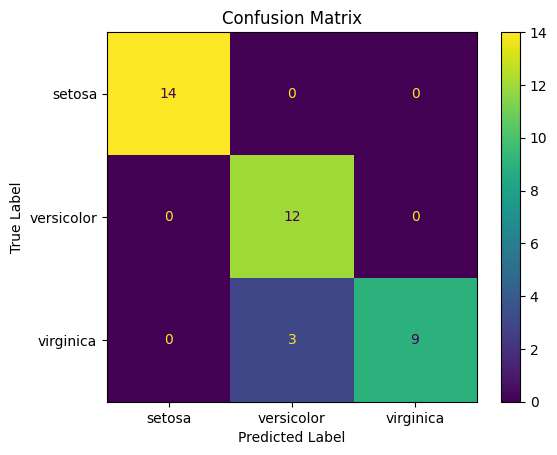

In [41]:
#create a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['setosa', 'versicolor', 'virginica'])
cmd_obj.plot()
cmd_obj.ax_.set(
                title='Confusion Matrix', 
                xlabel='Predicted Label', 
                ylabel='True Label')
plt.show()

# Question 3

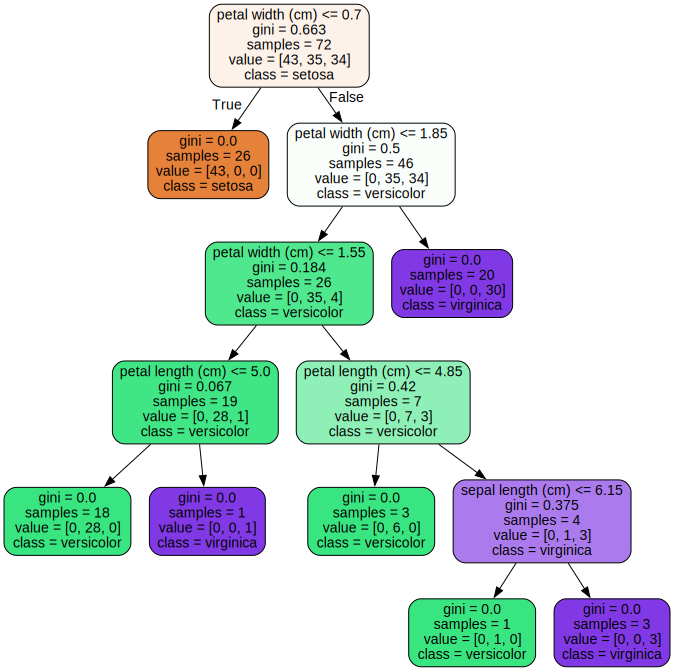

In [42]:
from sklearn.tree import export_graphviz
import graphviz

tree1 = rf_model.estimators_[0]

dot_data = export_graphviz(tree1,
                           filled=True,
                           rounded=True,
                           out_file=None,
                           feature_names=iris["feature_names"],
                           class_names=iris["target_names"]
                          )

graph = graphviz.Source(dot_data)
graph